In [1]:
import os
import os.path as op
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.precision', 5)
pd.set_option('chained_assignment', None)
sns.set_style("white")
sns.despine()
sns.set(context="paper", style="ticks", font_scale=1, font='Arial', rc={"lines.linewidth": 1.2,'axes.labelcolor':[0,0,0], 'axes.edgecolor':[0,0,0],
'xtick.color':[0,0,0], 'ytick.color':[0,0,0],'text.color':[0,0,0],'axes.linewidth': 1.2, "font.size":7.5,"axes.titlesize":8,"axes.labelsize":7.5,
                                                                        "xtick.labelsize":7.5, "ytick.labelsize":7})
plt.figure(figsize=(10, 10))
mpl.rc("savefig", dpi=300)

<Figure size 600x400 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [3]:
# Figure Color Palettes

overlap_cp =["#FAA819","#367CA3"]
overlap_cp2 =["#367CA3","#FAA819"]
overlap_cp3 = ["#367CA3","#78AE41"] 
psa_cp = ['#dbb036','#29658c', '#db6036']
psa_cp2 = ['#29658c', '#db6036']
psa_cp3 = ['#29658c','#dbb036']
psa_cp4 = ['#763995','#db6036']
psa_dots = ['#D3D3D3']
seg_cp = ['#378B2E',"#B94C73"]
seg_cp2 = ['#378B2E','#EA972E',"#B94C73"]
seg_cp_h1 = ['#55a549','#f4a753',"#d16994"]
seg_cp_h2 = ['#2e7c23','#c67720',"#9b345e"]
greay = ['#cccccc']
rois = ['']

## Load Data

In [39]:
## List Subjects
exp2_subjects = ['sub-Exp2s01','sub-Exp2s02','sub-Exp2s03' ,'sub-Exp2s04' ,'sub-Exp2s05' ,'sub-Exp2s06' ,'sub-Exp2s07',
             'sub-Exp2s08' ,'sub-Exp2s09','sub-Exp2s10','sub-Exp2s11','sub-Exp2s12','sub-Exp2s13','sub-Exp2s14',
             'sub-Exp2s15','sub-Exp2s16','sub-Exp2s17','sub-Exp2s18','sub-Exp2s19','sub-Exp2s20','sub-Exp2s21']

exp1_subjects = ['sub-Exp1s01','sub-Exp1s02','sub-Exp1s03' ,'sub-Exp1s04' ,'sub-Exp1s05' ,'sub-Exp1s06' ,'sub-Exp1s07',
             'sub-Exp1s08' ,'sub-Exp1s09','sub-Exp1s10','sub-Exp1s11','sub-Exp1s12','sub-Exp1s13','sub-Exp1s14',
             'sub-Exp1s15','sub-Exp1s16','sub-Exp1s17','sub-Exp1s18','sub-Exp1s19','sub-Exp1s20']

## Set Directories

MVPA_dir = '/Volumes/data/Avi/Route_Learning/mvpa_data/'
Behav_dir = '/Volumes/data/Avi/Route_Learning/behavioral_experiment_data/'


## Set condition dictionaries

exp1_compdict = {1:"same route", 2:"overlap", 3:"non overlap"}
exp2_compdict = {1:"same route", 2:"same dest", 3:"overlap", 4:"non overlap"}
compdict_vox = {3:"same route", 1:"overlap", 2:"non overlap"}


In [5]:
def load_data(analysisNum,subjects,MVPA_dir,experiment_string,compdict,analysis_type):
    analysis_name = 'analysis' + str(analysisNum)
    csv_name = analysis_name + '_' + analysis_type + ".csv"
    analysis = []
    for subj in subjects:
        analysis_dir = op.join(MVPA_dir,'%s',analysis_name)%subj
        analysis_file = op.join(analysis_dir, csv_name) 
        analysis_subj = pd.read_csv(analysis_file)
        analysis.append(analysis_subj)
    analysis= pd.concat(analysis)
    analysis['comparison'].replace(compdict, inplace=True)
    analysis['subject'] = experiment_string + analysis['subject'].astype(str)
    analysis['exp'] = experiment_string
    return analysis

In [6]:
exp1_analysis1 = load_data(1,exp1_subjects,MVPA_dir,'Exp1',exp1_compdict,'psa')
exp1_analysis2 = load_data(2,exp1_subjects,MVPA_dir,'Exp1',exp1_compdict,'psa')
exp1_analysis4 = load_data(4,exp1_subjects,MVPA_dir,'Exp1',exp1_compdict,'psa')
exp1_analysis5 = load_data(5,exp1_subjects,MVPA_dir,'Exp1',exp1_compdict,'psa')
exp1_vox = load_data(3,exp1_subjects,MVPA_dir,'Exp1',compdict_vox,'comb')
exp1_rank_corr = load_data(3,exp2_subjects,MVPA_dir,'Exp1',compdict_vox,'rankCorr')

exp2_analysis1 = load_data(1,exp2_subjects,MVPA_dir,'Exp2',exp2_compdict,'psa')
exp2_analysis2 = load_data(2,exp2_subjects,MVPA_dir,'Exp2',exp2_compdict,'psa')
exp2_analysis4 = load_data(4,exp2_subjects,MVPA_dir,'Exp2',exp2_compdict,'psa')
exp2_analysis5 = load_data(5,exp2_subjects,MVPA_dir,'Exp2',exp2_compdict,'psa')
exp2_vox = load_data(3,exp2_subjects,MVPA_dir,'Exp2',compdict_vox,'comb')
exp2_rank_corr = load_data(3,exp2_subjects,MVPA_dir,'Exp2',compdict_vox,'rankCorr')

In [7]:
# Combine data across experiments

#Analysis 1: psa halves SEG 1 
frames = [exp1_analysis1, exp2_analysis1]
combined_seg1 = pd.concat(frames)

#Analysis 2: psa halves SEG 2
frames = [exp1_analysis2, exp2_analysis2]
combined_seg2 = pd.concat(frames)

#Analysis 3: Voxel level plasticity 
frames = [exp1_vox, exp2_vox]
combined_vox = pd.concat(frames)

#Analysis 3: rank correlation
frames = [exp1_rank_corr, exp2_rank_corr]
combined_rankCorr  = pd.concat(frames)


#Analysis 4: psa every 2 runs
frames = [exp1_analysis4, exp2_analysis4]
combined_2runs = pd.concat(frames)

#Analysis 5: TR X TR Sliding Window
frames = [exp1_analysis5, exp2_analysis5]
combined_trxtr_sliding = pd.concat(frames)


## Figure 3

In [8]:
# Second Half: Create overlap - non-overlap difference score for segment 1
aa = combined_seg1.loc[combined_seg1['comparison'].isin(['overlap','non overlap']) & combined_seg1['half'].isin([2])]
bb= pd.pivot_table(aa,values='sim',index=['subject','mask'], columns = ['comparison'])
bb['diff'] = bb['overlap'] - bb['non overlap']
bb = bb.reset_index()
diffdf = pd.melt(bb, id_vars=['subject','mask'],value_vars = ['diff'],value_name='sim')

# Second Half: Create overlap - non-overlap difference score for segment 2
aa = combined_seg2.loc[combined_seg2['comparison'].isin(['overlap','non overlap']) & combined_seg2['half'].isin([2])]
bb= pd.pivot_table(aa,values='sim',index=['subject','mask'], columns = ['comparison'])
bb['diff'] = bb['overlap'] - bb['non overlap']
bb = bb.reset_index()
diffdf_seg2 = pd.melt(bb, id_vars=['subject','mask'],value_vars = ['diff'],value_name='sim')

#Combine across segs
diffdf['seg'] = '1'
diffdf_seg2['seg'] = '2'
diff_allsegs = pd.concat([diffdf,diffdf_seg2])

In [9]:
#Create first - second half difference score Seg 1
aa = combined_seg1.loc[combined_seg1['comparison'].isin(['overlap','non overlap'])]
bb= pd.pivot_table(aa,values='sim',index=['subject','mask','comparison'], columns = ['half'])
bb['diff'] = bb[2] - bb[1]
bb = bb.reset_index()
diffhalf = pd.melt(bb, id_vars=['subject','mask','comparison'],value_vars = ['diff'],value_name='sim')

/Applications/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Applications/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


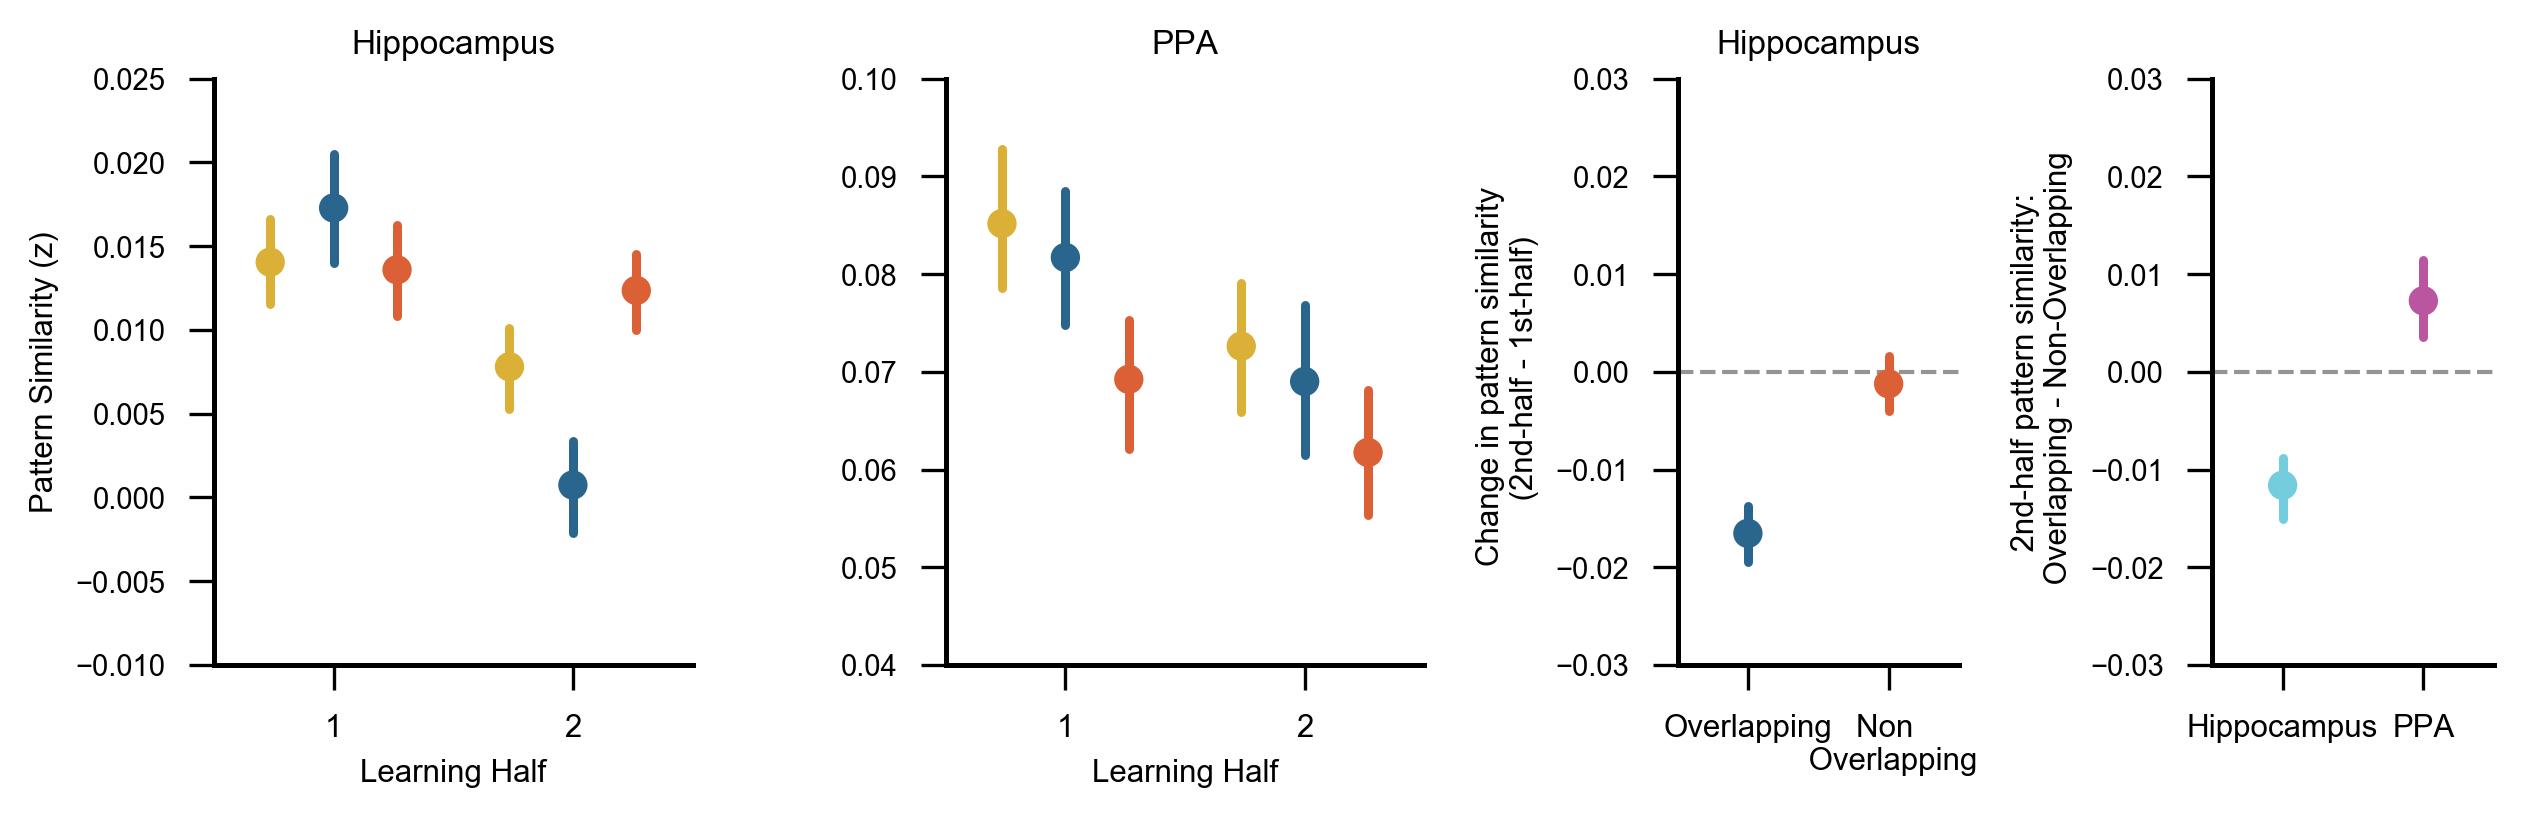

In [10]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8.5, 2.76), sharex=False,gridspec_kw = {'width_ratios':[1.7,1.7,1, 1]})

sns.pointplot('half',y='sim', hue = 'comparison', 
               hue_order = ['same route','overlap','non overlap'],data = combined_seg1.query("mask=='HIPP'"), 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax1)
ax1.set(ylabel='Pattern Similarity (z)',xlabel='Learning Half',title='Hippocampus',ylim =[-0.01,.025 ])
ax1.legend_ = None
sns.despine()

sns.pointplot('half',y='sim', hue = 'comparison', 
               hue_order = ['same route','overlap','non overlap'],data = combined_seg1.query("mask=='PPA'"), 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax2)

ax2.set(ylabel='',xlabel='Learning Half',title='PPA',ylim =[0.04,.1])
ax2.legend_ = None

sns.pointplot('comparison',y='sim', order = ['overlap','non overlap'],
              data = diffhalf.loc[diffhalf['mask'].isin(['HIPP'])],
              dodge = .53, join = False, ci=68, palette =psa_cp2,legend=False, ax = ax3)
plt.setp(ax3.lines, zorder=100)
plt.setp(ax3.collections, zorder=100, label="")
ax3.legend_ = None
ax3.axhline(y = 0,linewidth=1,linestyle = '--', color='#949494',zorder=0)
sns.despine()
ax3.set(ylabel='Change in pattern similarity \n (2nd-half - 1st-half)',xlabel='',
        xticklabels=['Overlapping', 'Non \n Overlapping'],title='Hippocampus',ylim=[-0.03,0.03])


sns.pointplot('mask',y='sim', data = diffdf.loc[diffdf['mask'].isin(['HIPP','PPA'])],
              dodge = .53, join = False, ci=68, palette =['#73cddc','#ba56a0'],legend=False, ax = ax4)
plt.setp(ax4.lines, zorder=100)
plt.setp(ax4.collections, zorder=100, label="")
ax4.legend_ = None
ax4.axhline(y = 0,linewidth=1,linestyle = '--', color='#949494',zorder=0)
sns.despine()
ax4.set(ylabel=' 2nd-half pattern similarity: \n Overlapping - Non-Overlapping',xlabel='',
        xticklabels = ['Hippocampus','PPA'],title='',ylim=[-0.03,0.03])
plt.gcf().tight_layout(w_pad=1)

## Figure 4

In [11]:
# Create overlap - non-overlap difference score for each TR
aa = combined_trxtr_sliding.loc[combined_trxtr_sliding['comparison'].isin(['overlap','non overlap'])]
bb= pd.pivot_table(aa,values='sim',index=['subject','mask','half','exp','TR'], columns = ['comparison'])
bb['diff'] = bb['overlap'] - bb['non overlap']
bb = bb.reset_index()
diff_trxtr = pd.melt(bb, id_vars=['subject','mask','half','TR','exp'],value_vars = ['diff'],value_name='sim')

In [12]:
## Extract data to plot
hipp_useTR_h1 = diff_trxtr.loc[diff_trxtr['mask'].isin(['HIPP']) & 
                            diff_trxtr['half'].isin([1]) & diff_trxtr['TR'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])]
hipp_useTR_h2 = diff_trxtr.loc[diff_trxtr['mask'].isin(['HIPP']) & 
                            diff_trxtr['half'].isin([2]) & diff_trxtr['TR'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])]
trdict = {1:"Segment 1",2:"Segment 1",3:"Segment 1",3:"Segment 1",
           4:"Segment 1",5:"Segment 1",6:"Segment 1",7:"Segment 1",
         8:"Segment 1",9:"Segment 1",10:"Segment 1",11:"Segment 1",
         12:"Transition",13:"Transition",14:"Segment 2",15:"Segment 2",
         16:"Segment 2"}
hipp_useTR_h1['tr_type'] = hipp_useTR_h1['TR']
hipp_useTR_h1['tr_type'].replace(trdict, inplace=True)
hipp_useTR_h2['tr_type'] = hipp_useTR_h2['TR']
hipp_useTR_h2['tr_type'].replace(trdict, inplace=True)

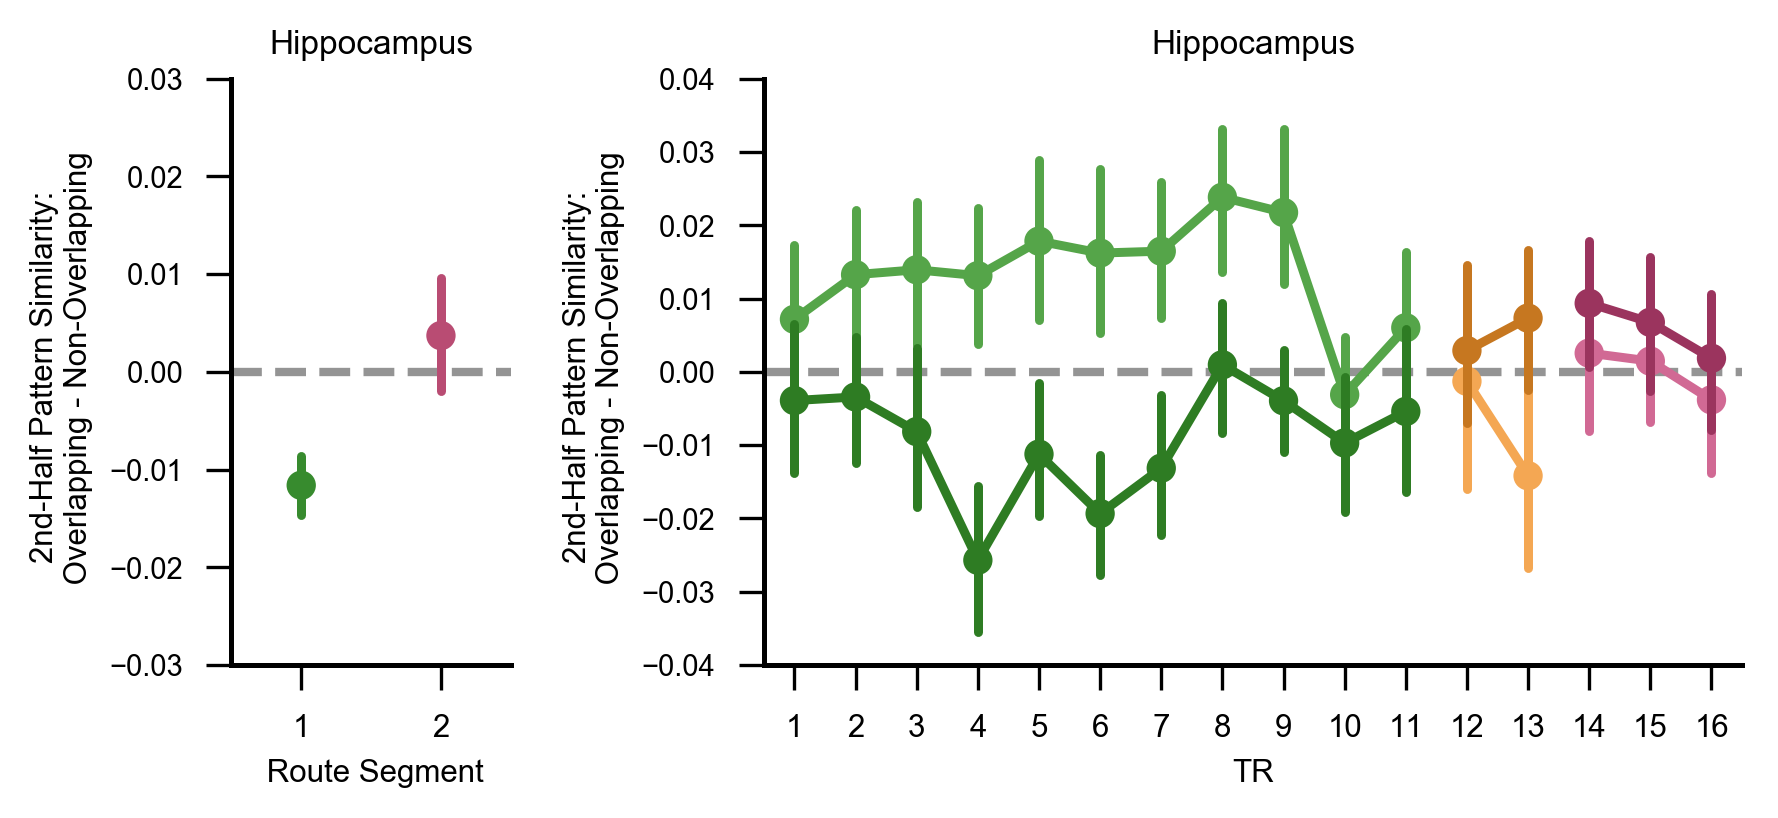

In [13]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(6, 2.76), sharex=False,gridspec_kw = {'width_ratios':[.8,2.8]})


sns.pointplot('seg',y='sim', 
               data = diff_allsegs.loc[diff_allsegs['mask'].isin(['HIPP'])], 
               dodge = .53, size = 4.5, join = False, ci=68, palette =seg_cp,legend=False, ax = ax1)

plt.setp(ax1.lines, zorder=100)
plt.setp(ax1.collections, zorder=100, label="")
ax1.legend_ = None
sns.despine()
ax1.axhline(y = 0,linewidth=2,linestyle = '--', color='#949494',zorder=0)
ax1.set(ylabel='2nd-Half Pattern Similarity: \n Overlapping - Non-Overlapping',xlabel=' Route Segment',title='Hippocampus',
        ylim =[-0.030,.03])

sns.pointplot('TR',y='sim', hue = 'tr_type', 
               data = hipp_useTR_h1,   palette = seg_cp_h1,join = True, ci=68,legend=False, ax = ax2)
sns.pointplot('TR',y='sim', hue = 'tr_type', 
               data = hipp_useTR_h2,   palette = seg_cp_h2,join = True, ci=68,legend=False, ax = ax2)
plt.setp(ax2.lines, zorder=100)
plt.setp(ax2.collections, zorder=100, label="")
ax2.legend_ = None
ax2.axhline(y = 0,linewidth=2,linestyle = '--', color='#949494',zorder=0)
sns.despine()

ax2.set(ylabel='2nd-Half Pattern Similarity: \n Overlapping - Non-Overlapping',xlabel='TR',title='Hippocampus',ylim =[-0.040,.04])


plt.gcf().tight_layout(w_pad=1)

## Figure 5

In [14]:
subjects = [3,4,5,6,7,9,11,13,14,15,16,17,18,19,20,21,22,23,24,26,28,30]
odict = {1:'Seg1', 2:'Seg2'}
hdict = {1:'half1', 2:'half2'}

In [15]:
behav_data = []
for subj in subjects:
    analysis_dir = op.join(Behav_dir, 'Overlap_behav_sub%02d') %subj
    behav_file = op.join(analysis_dir, 'IR_sum.csv') 
    behav_subj = pd.read_csv(behav_file)
    behav_data.append(behav_subj)
behav_data= pd.concat(behav_data)

In [16]:
behav_data['overlap'].replace(odict, inplace=True)
behav_data['half'].replace(hdict, inplace=True)
behav_data['chance'] = .5
behav_data['onset'] = (behav_data['pic_number']-1) * .23
behav_data['TR_bin'] = np.floor(behav_data['onset']/1.5 + 1).astype(int)
behav_data_g = behav_data.groupby(['subject','TR_bin','corr_route'])
behav_data_tr = pd.DataFrame(behav_data_g['hits'].mean()).reset_index()

In [17]:
groupdict = {1:1 ,2:1 ,3:1, 4:1,
             5:2,6:2,7:2, 8:2}
behav_data_tr['group'] =behav_data_tr['corr_route']
behav_data_tr['group'].replace(groupdict, inplace=True)

In [18]:
aa = combined_trxtr_sliding.loc[combined_trxtr_sliding['comparison'].isin(['overlap','non overlap'])]
bb= pd.pivot_table(aa,values='sim',index=['subject','mask','half','exp','TR','group'], columns = ['comparison'])
bb['diff'] = bb['overlap'] - bb['non overlap']
bb = bb.reset_index()
diff_trxtr = pd.melt(bb, id_vars=['subject','mask','half','TR','exp','group'],value_vars = ['diff'],value_name='sim')

In [19]:
hipp_useTR = diff_trxtr.loc[diff_trxtr['mask'].isin(['HIPP']) & 
                            diff_trxtr['half'].isin([2]) & diff_trxtr['TR'].isin([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])]
trdict = {1:"Segment 1",2:"Segment 1",3:"Segment 1",
           4:"Segment 1",5:"Segment 1",6:"Segment 1",7:"Segment 1",
         8:"Segment 1",9:"Segment 1",10:"Segment 1",11:"Segment 1",
         12:"Transition",13:"Transition",14:"Segment 2",15:"Segment 2",
         16:"Segment 2"}
hipp_useTR['tr_type'] = hipp_useTR['TR']
hipp_useTR['tr_type'].replace(trdict, inplace=True)
behav_data_tr['tr_type'] = behav_data_tr['TR_bin']
behav_data_tr['tr_type'].replace(trdict, inplace=True)
behav_data_tr['hits'] = behav_data_tr['hits']*100

In [27]:
group_average_bd = behav_data_tr.groupby(['TR_bin'])
group_average_bd=  pd.DataFrame(group_average_bd['hits','tr_type'].mean()).reset_index()
group_average_nd = hipp_useTR.loc[hipp_useTR['exp'].isin(['Exp1'])].groupby(['TR','tr_type'])
group_average_nd=  pd.DataFrame(group_average_nd['sim'].mean()).reset_index()

In [28]:
group_average_bd_o = group_average_bd.loc[group_average_bd['TR_bin'].isin([1,2,3,4,5,6,7,8,9,10,11])]
group_average_nd_o = group_average_nd.loc[group_average_nd['TR'].isin([1,2,3,4,5,6,7,8,9,10,11])]

In [29]:
group_average_bd['TR'] = group_average_bd['TR_bin']
bd_nd = pd.merge(group_average_bd,group_average_nd)
#bd_nd['hits'] = bd_nd['hits']*100

In [30]:
behav_data_tr.loc[-1] = [100,16,99,0,100,'na']

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


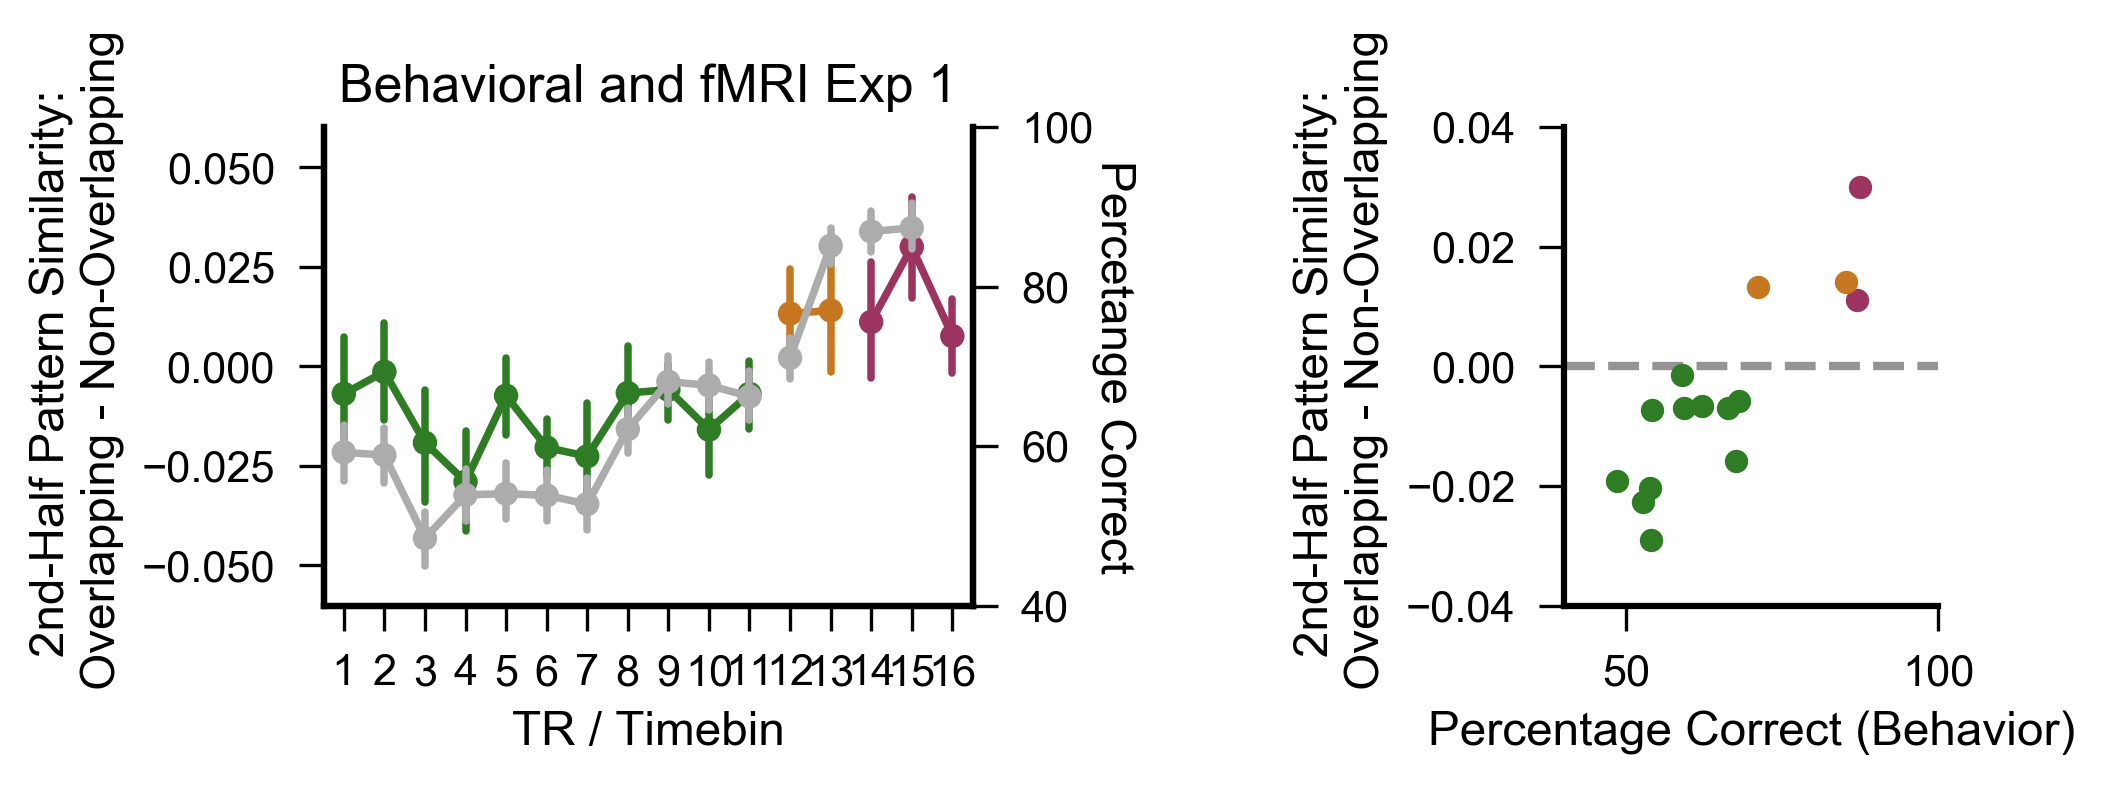

In [33]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(7, 2.76), sharex=False, sharey =False,gridspec_kw = {'width_ratios':[1.3,.75]})

sns.set(context="paper", style="ticks", font_scale=1.3, font='Arial', 
        rc={"lines.linewidth": 1,'axes.labelcolor':[0,0,0], 'axes.edgecolor':[0,0,0],'xtick.color':[0,0,0], 
            'ytick.color':[0,0,0],'text.color':[0,0,0], 'pdf.fonttype':42,'axes.linewidth': 1.5})
sns.pointplot('TR',y='sim', hue = 'tr_type', 
               data = hipp_useTR.loc[hipp_useTR['exp'].isin(['Exp1'])],  palette = seg_cp_h2,join = True, ci=68,legend=False, ax = ax1)
plt.setp(ax1.lines, zorder=100)
plt.setp(ax1.collections, zorder=100, label="")
ax1.legend_ = None
#ax1.axhline(y = 0,linewidth=2,linestyle = '--', color='#949494',zorder=0)
sns.despine(top=True)

ax1.set(ylabel='2nd-Half Pattern Similarity: \n Overlapping - Non-Overlapping',xlabel='TR / Timebin',title='Behavioral and fMRI Exp 1', 
        ylim=[-0.0601,0.0601],xticklabels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

ax1a = ax1.twinx()
sns.pointplot('TR_bin',y='hits', hue = 'tr_type', data = behav_data_tr,  palette = ['#acacac'], alpha = 0.02, join = True, ci=68,legend=False, ax = ax1a,)
plt.gcf().tight_layout(w_pad=1)
ax1a.set(ylabel='Percetange Correct',ylim = [40,100])
ax1a.set_ylabel('Percetange Correct',rotation=270,labelpad=10)
ax1a.legend_ = None

sns.despine(top=True,right =False)

seg_cp_h2_2 = ['#2e7c23',"#9b345e",'#c67720']

groups = bd_nd.groupby('tr_type')
ax2.set_color_cycle(seg_cp_h2_2)
for name,group in groups:
    ax2.plot(group.hits,group.sim,marker = 'o',linestyle='')

    
ax2.set(ylabel='2nd-Half Pattern Similarity: \n Overlapping - Non-Overlapping',xlabel='Percentage Correct (Behavior)',
        xlim = [40,100], ylim=[-0.04,0.04] )
ax2.axhline(y = 0,linewidth=2,linestyle = '--', color='#949494',zorder=0)
sns.despine(ax = ax2)
plt.gcf().tight_layout(w_pad=3)

## Figure 6

In [34]:
combined_vox['bin3'] = 4-np.ceil(combined_vox['voxRank']/100)
binned3 = combined_vox.groupby(['subject','mask','half','bin3','exp','comparison'])
binned3  = pd.DataFrame(binned3['sim'].mean()).reset_index()

In [35]:
grouped3 = binned3.groupby(['subject','mask','bin3','half','comparison', 'exp'])
grouped3 = pd.DataFrame(grouped3['sim'].mean()).reset_index()
bindict = {1:"Weak",2:"Moderate",3:"Strong"}
grouped3['bin3'].replace(bindict, inplace=True)

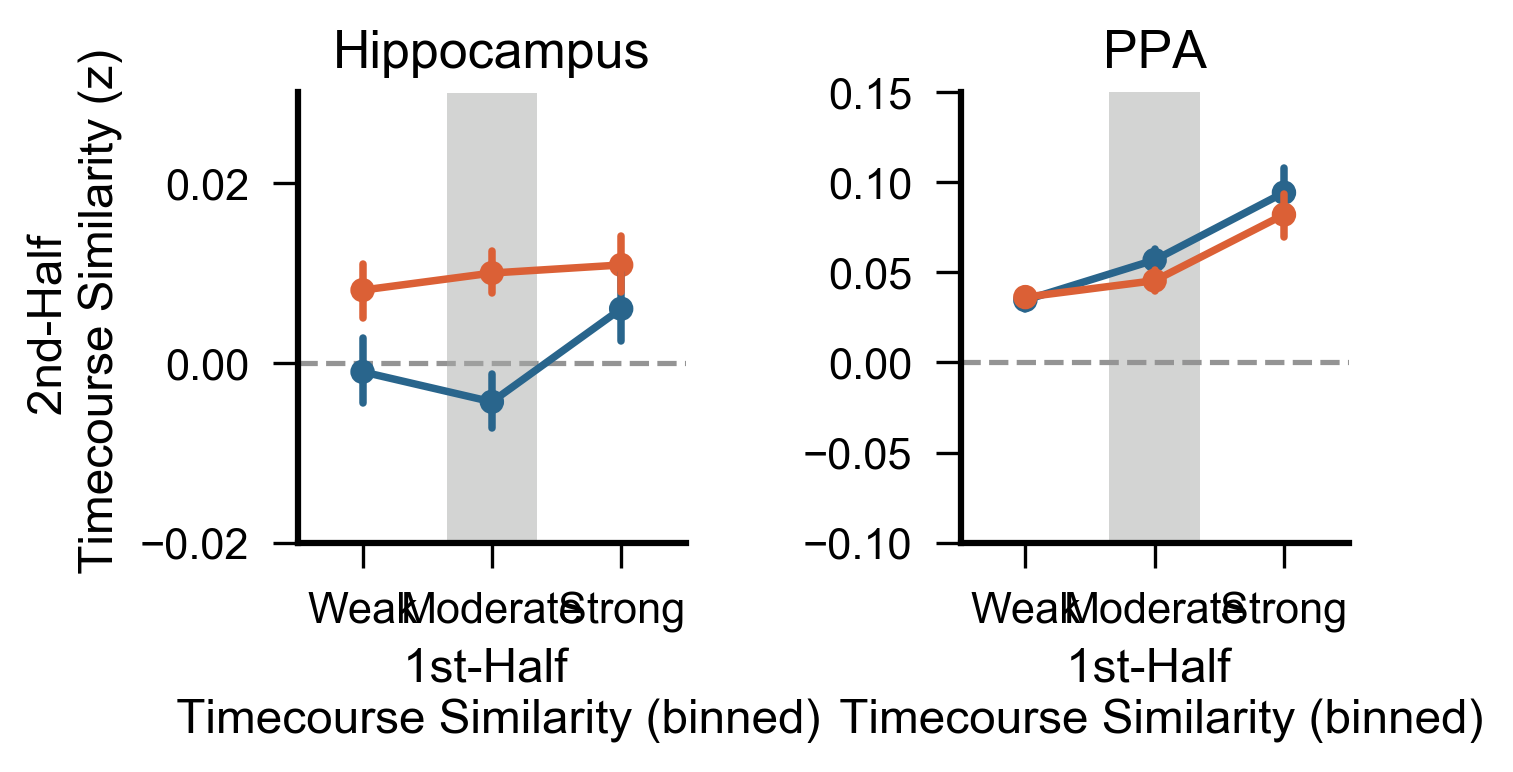

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.76), sharex=False)

ax1.add_patch(Rectangle((.65, -.02), .7, .05, facecolor='#a9aaa9',alpha = .5,zorder=0))



#HIPP Average
sns.pointplot('bin3',y='sim', hue = 'comparison',data = 
              grouped3.loc[grouped3['mask'].isin(['HIPP']) & grouped3['comparison'].isin(['overlap','non overlap'])
                          & grouped3['half'].isin([2])], hue_order = ['overlap','non overlap'],
               join = True,palette =psa_cp2, size = 4, ci= 68, ax = ax1)

plt.setp(ax1.lines, zorder=100)
plt.setp(ax1.collections, zorder=100, label="")

ax1.set(ylabel='2nd-Half \n Timecourse Similarity (z)',xlabel='1st-Half \n Timecourse Similarity (binned)',
        title='Hippocampus',ylim=[-0.020,.0301])
ax1.legend_ = None
sns.despine()
ax1.axhline(y = 0,linewidth=1.25,linestyle = '--', color='#949494',zorder=-1)


##PPA

ax2.add_patch(Rectangle((.65, -.1), .7, .25, facecolor='#a9aaa9',alpha = .5,zorder=-1))

plt.setp(ax2.collections, zorder=-1, label="")
plt.setp(ax2.lines, zorder=-1)



#PPA Average overlap
ppa_a = sns.pointplot('bin3',y='sim', hue = 'comparison',data = 
              grouped3.loc[grouped3['mask'].isin(['PPA']) & grouped3['comparison'].isin(['overlap','non overlap'])
                          & grouped3['half'].isin([2])], hue_order = ['overlap','non overlap'],
               join = True,palette =psa_cp2, size = 4, ci= 68, ax = ax2)

plt.setp(ppa_a, zorder=20)


ax2.axhline(y = 0,linewidth=1.25,linestyle = '--', color='#949494',zorder=-1)

ax2.set(ylabel='', xlabel='1st-Half \n Timecourse Similarity (binned)',title='PPA',ylim=[-0.1,.15])
ax2.legend_ = None
sns.despine()
plt.gcf().tight_layout(w_pad=1)

# SUPPLEMENT

## Figure S2

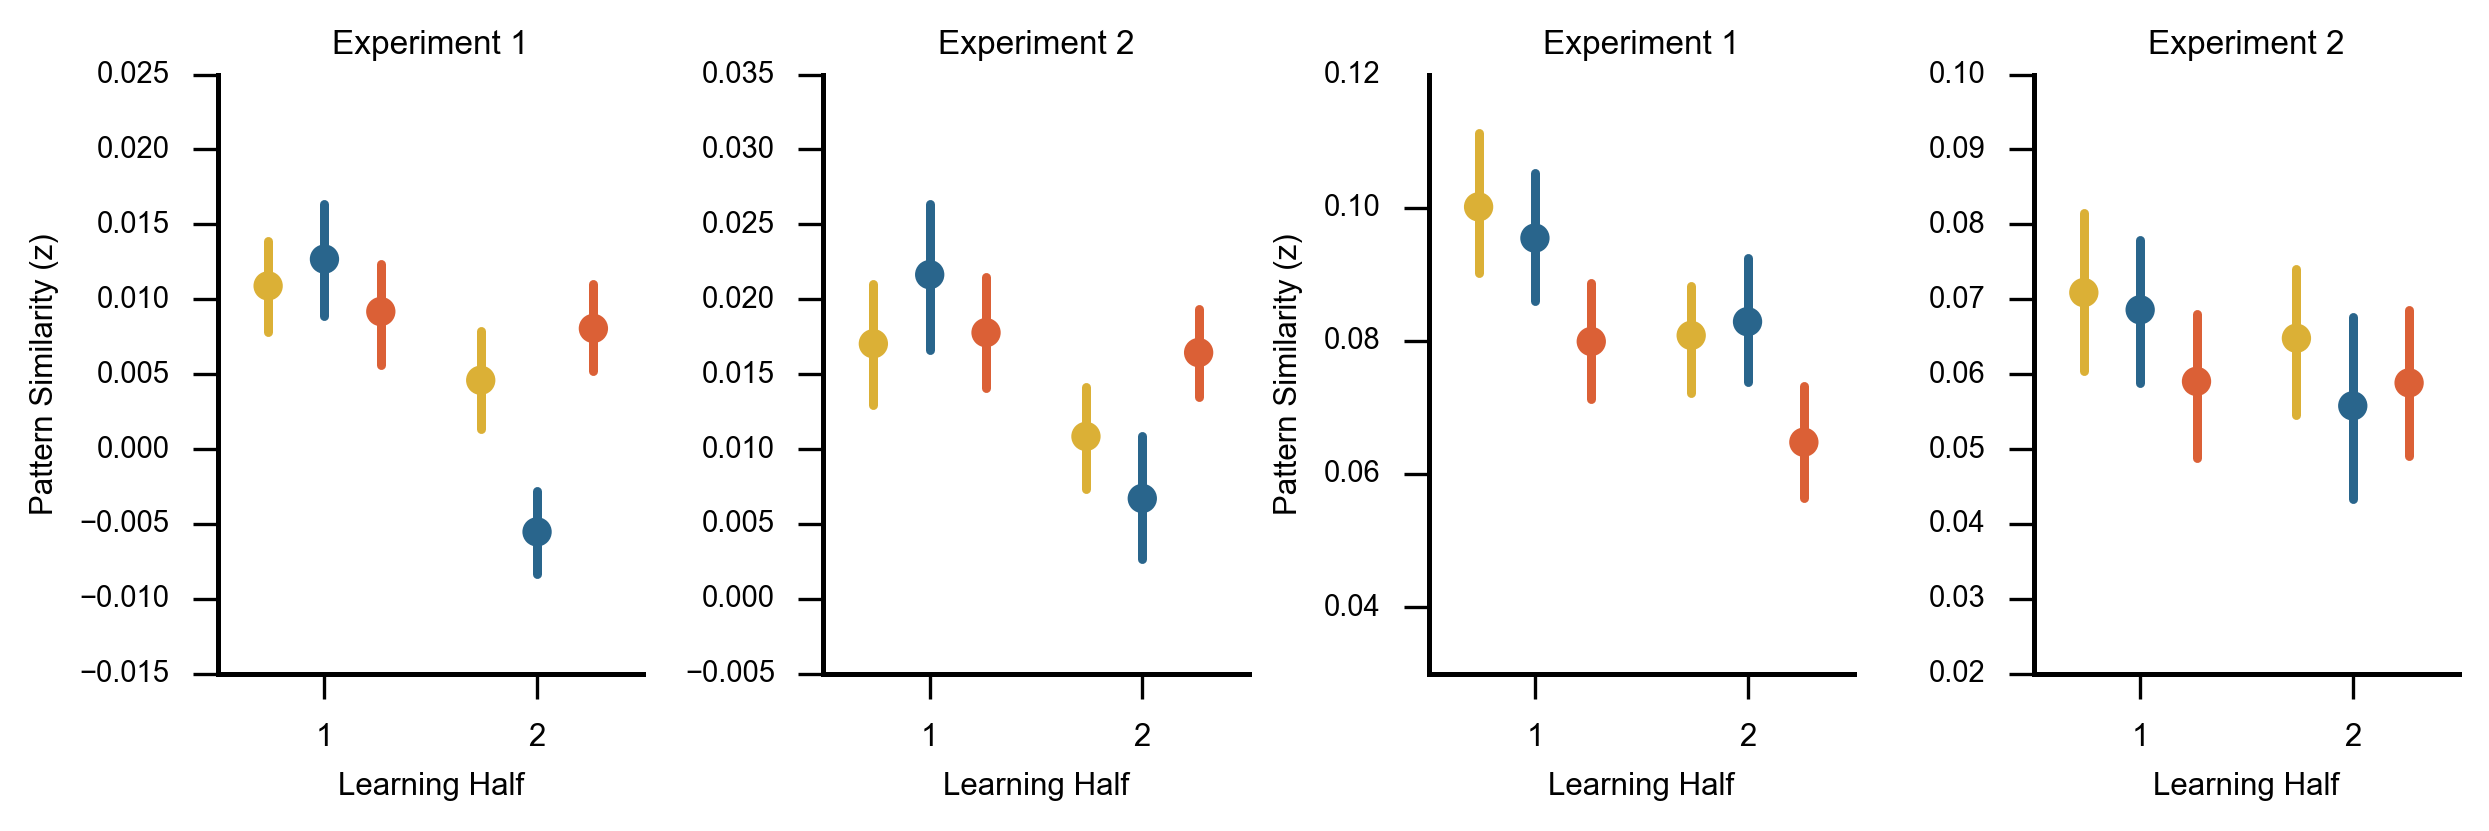

In [25]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8.3, 2.76), sharex=False)

#Experiment 1
sns.pointplot('half',y='sim', hue = 'comparison', hue_order = ['same route','overlap','non overlap'],
              data = combined_seg1.loc[combined_seg1['mask'].isin(['HIPP']) & combined_seg1['exp'].isin(['Exp1'])], 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax1)
ax1.legend_ = None
sns.despine()

ax1.set(ylabel='Pattern Similarity (z)',xlabel='Learning Half',title='Experiment 1',ylim=[-0.015,0.025])

#Experiment 2
sns.pointplot('half',y='sim', hue = 'comparison', hue_order = ['same route','overlap','non overlap'],
              data = combined_seg1.loc[combined_seg1['mask'].isin(['HIPP']) & combined_seg1['exp'].isin(['Exp2'])], 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax2)

ax2.legend_ = None
sns.despine()

ax2.set(ylabel='',xlabel='Learning Half',title='Experiment 2',ylim=[-0.005,0.035])

#Experiment 1
sns.pointplot('half',y='sim', hue = 'comparison', hue_order = ['same route','overlap','non overlap'],
              data = combined_seg1.loc[combined_seg1['mask'].isin(['PPA']) & combined_seg1['exp'].isin(['Exp1'])], 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax3)
ax3.legend_ = None
sns.despine()

ax3.set(ylabel='Pattern Similarity (z)',xlabel='Learning Half',title='Experiment 1',ylim=[0.03,0.12])

#Experiment 2
sns.pointplot('half',y='sim', hue = 'comparison', hue_order = ['same route','overlap','non overlap'],
              data = combined_seg1.loc[combined_seg1['mask'].isin(['PPA']) & combined_seg1['exp'].isin(['Exp2'])], 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax4)

ax4.legend_ = None
sns.despine()

ax4.set(ylabel='',xlabel='Learning Half',title='Experiment 2',ylim=[0.02,0.1])

plt.gcf().tight_layout(w_pad=1)

## Figure S3

In [44]:
combined_2runs = combined_2runs.loc[combined_2runs['mask'].isin(['HIPP'])]
combined_2runs_o_no = combined_2runs.loc[combined_2runs['comparison'].isin(['overlap','non overlap'])]

# Compute overlap - non overlap difference score
combined_2runs_o_no['diff'] = combined_2runs_o_no.groupby(['subject','mask','run_group'])['sim'].transform(np.diff)
diff_2runs = combined_2runs_o_no.groupby(['subject','mask','run_group','exp'])
diff_2runs = pd.DataFrame(diff_2runs['diff'].mean()).reset_index()
diff_2runs['diff'] = 0-diff_2runs['diff']

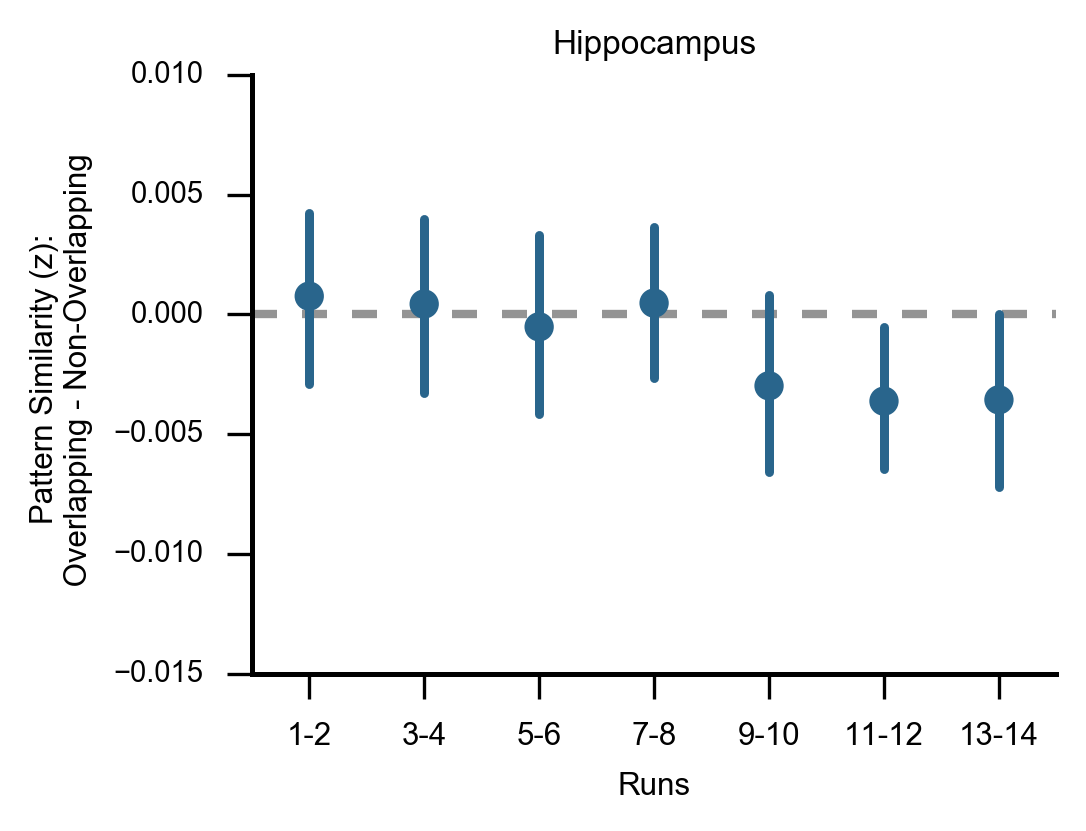

In [38]:
f, ax1 = plt.subplots(1, 1, figsize=(3.6, 2.76), sharex=False)

sns.pointplot('run_group',y='diff',data = diff_2runs.loc[diff_2runs['mask'].isin(["HIPP"])], 
               dodge = .4, size = 4.5, join = False, ci=68, palette = ['#29658c'],legend=False, ax = ax1)
plt.setp(ax1.lines, zorder=100)
plt.setp(ax1.collections, zorder=100, label="")
ax1.axhline(y = 0,linewidth=2,linestyle = '--', color='#949494',zorder=0)
ax1.legend_ = None
sns.despine()

ax1.set(ylabel='Pattern Similarity (z): \n Overlapping - Non-Overlapping',xlabel='Runs',title='Hippocampus',ylim=[-0.015,.01001],
       xticklabels=(['1-2', '3-4','5-6','7-8','9-10','11-12','13-14']))

plt.gcf().tight_layout(w_pad=1)


## Figure S4

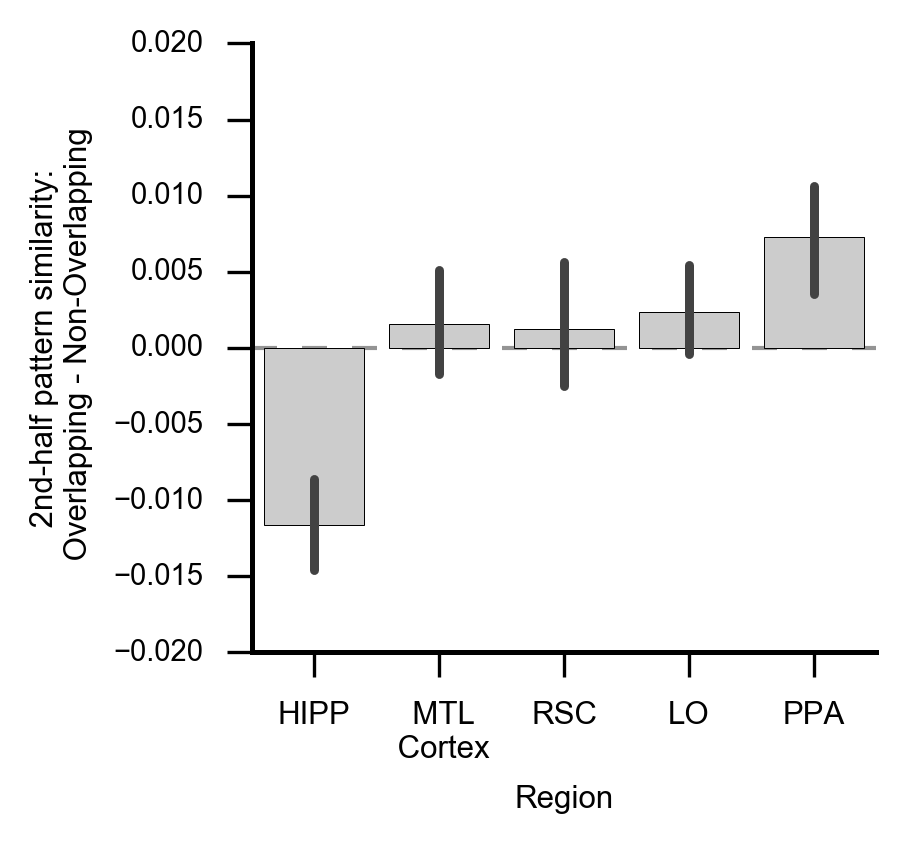

In [28]:
f, ax1 = plt.subplots(1, 1, figsize=(3, 2.76), sharex=False)

sns.barplot('mask',y='sim',order = ['HIPP','MTL VS no PPA','RSC','LOC','PPA',],data = diffdf, ci=68, palette =['#cccccc'], ax = ax1)
ax1.set(ylabel=' 2nd-half pattern similarity: \n Overlapping - Non-Overlapping',xticklabels = ['HIPP', '  MTL \n Cortex', 'RSC', 'LO', 'PPA'], xlabel='Region',ylim = [-.02,0.02])
ax1.legend_ = None
ax1.axhline(y = 0,linewidth=1, linestyle = '--', color='#949494',zorder=0)
sns.despine()

plt.gcf().tight_layout(w_pad=1)


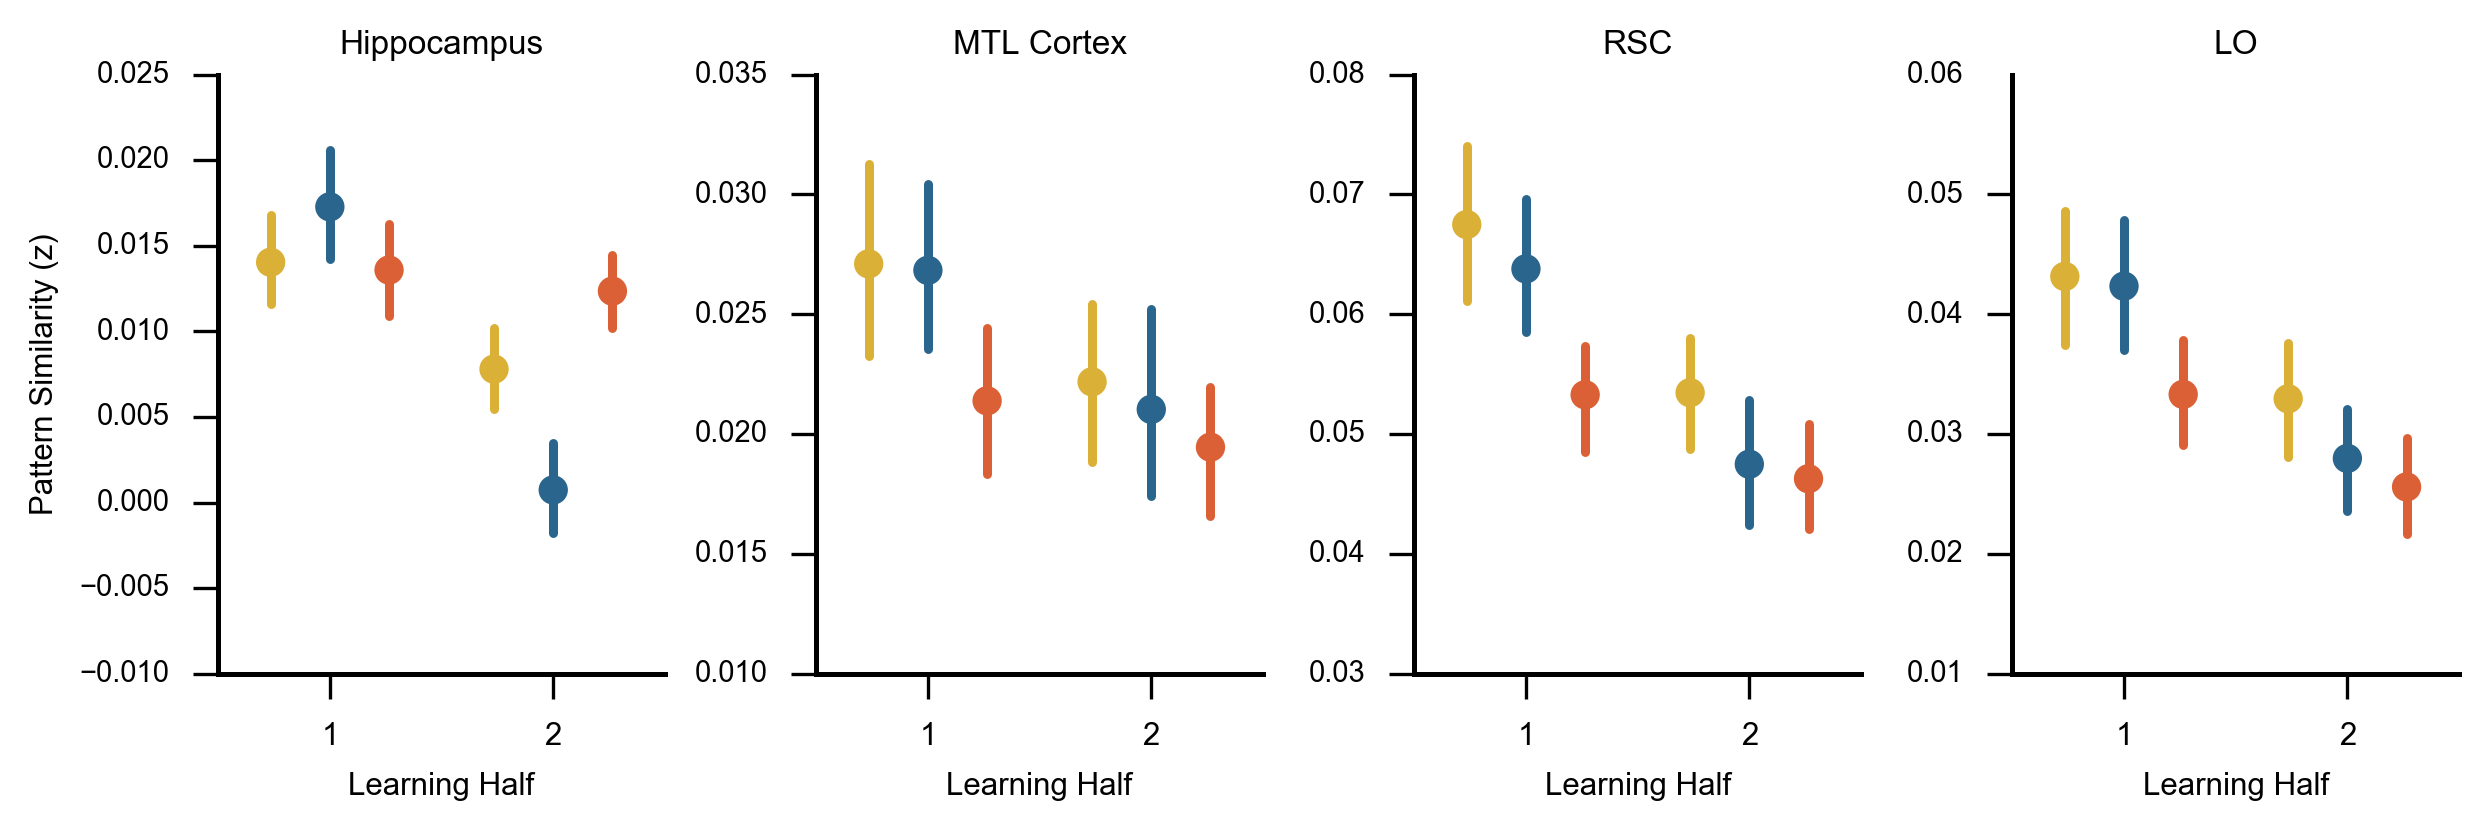

In [27]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8.3, 2.76), sharex=False)

sns.pointplot('half',y='sim', hue = 'comparison', 
               hue_order = ['same route','overlap','non overlap'],data = combined_seg1.query("mask=='HIPP'"), 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax1)
ax1.set(ylabel='Pattern Similarity (z)',xlabel='Learning Half',title='Hippocampus',ylim =[-0.01,.025 ])
ax1.legend_ = None
sns.despine()


sns.pointplot('half',y='sim', hue = 'comparison', 
               hue_order = ['same route','overlap','non overlap'],data = combined_seg1.query("mask=='MTL VS no PPA'"), 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax2)

ax2.set(ylabel='',xlabel='Learning Half',title='MTL Cortex',ylim =[0.01,.035])
ax2.legend_ = None

sns.pointplot('half',y='sim', hue = 'comparison', 
               hue_order = ['same route','overlap','non overlap'],data = combined_seg1.query("mask=='RSC'"), 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax3)


ax3.set(ylabel='',xlabel='Learning Half',title='RSC',ylim =[0.03,.08])
ax3.legend_ = None

sns.pointplot('half',y='sim', hue = 'comparison', 
               hue_order = ['same route','overlap','non overlap'],data = combined_seg1.query("mask=='LOC'"), 
               dodge = .53, size = 4.5, join = False, ci=68, palette =psa_cp,legend=False, ax = ax4)

ax4.set(ylabel='',xlabel='Learning Half',title='LO',ylim =[0.01,.06])
ax4.legend_ = None


plt.gcf().tight_layout(w_pad=1)

## Figure S6

In [39]:
hipp_over_h1 = combined_vox.loc[combined_vox['mask'].isin(['HIPP']) & combined_vox['comparison'].isin(['overlap']) & combined_vox['half'].isin([1])]
hipp_nover_h1 = combined_vox.loc[combined_vox['mask'].isin(['HIPP']) & combined_vox['comparison'].isin(['non overlap']) & combined_vox['half'].isin([1])]
hipp_over_h2 = combined_vox.loc[combined_vox['mask'].isin(['HIPP']) & combined_vox['comparison'].isin(['overlap']) & combined_vox['half'].isin([2])]
hipp_nover_h2 = combined_vox.loc[combined_vox['mask'].isin(['HIPP']) & combined_vox['comparison'].isin(['non overlap']) & combined_vox['half'].isin([2])]

In [42]:
combined_rankCorr['binOverlap'] = combined_rankCorr['binOverlap']*100

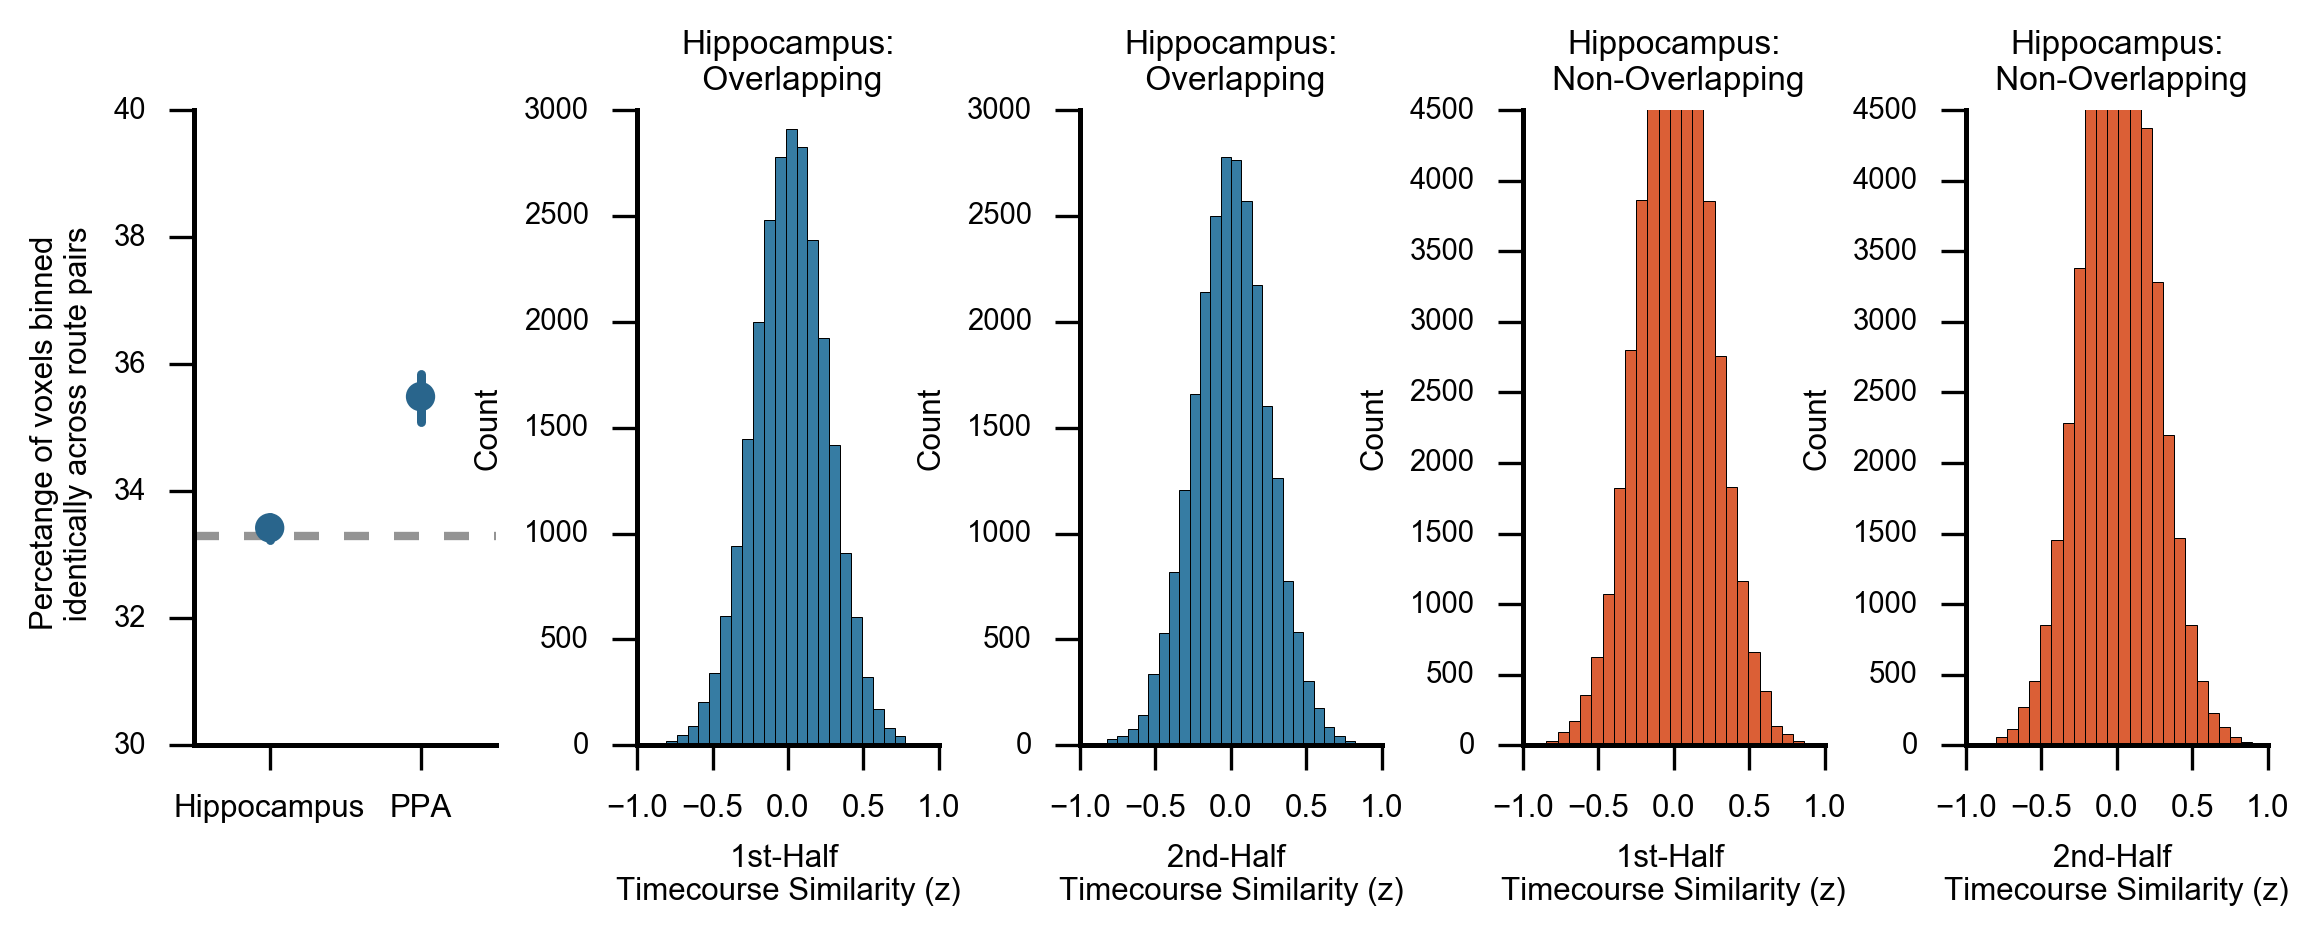

In [43]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(7.7, 2.76), sharex=False)

sns.pointplot('mask',y='binOverlap', hue = 'comparison',hue_order = ['overlap'], order = ['HIPP', 'PPA'],
                   aspect = 1, sharey = False,data = combined_rankCorr, kind='point',dodge = .3, size = 3, ci=68, join = False, 
                   palette =psa_cp2,legend=False, ax = ax1)
sns.despine()
ax1.axhline(y = 33.3,linewidth=2,linestyle = '--', color='#949494',zorder=0)
plt.gcf().tight_layout(w_pad=1)
ax1.set(ylabel='Percetange of voxels binned \n identically across route pairs',ylim = [30,40],xlabel = '',xticklabels = ['Hippocampus','PPA'])
ax1.legend_ = None

#Overlap Sim Values
n, bins, patches = ax2.hist(hipp_over_h1['sim'].values,bins = 30,color = ["#367CA3"])
ax2.set(ylabel='Count',xlabel='1st-Half \nTimecourse Similarity (z)', title='Hippocampus:\n Overlapping',xlim=[-1,1],ylim=[0,3000])
ax2.legend_ = None
sns.despine()

#Overlap Sim Values
n, bins, patches = ax3.hist(hipp_over_h2['sim'].values,bins = 30,color = ["#367CA3"])
ax3.set(ylabel='Count',xlabel='2nd-Half \nTimecourse Similarity (z)', title='Hippocampus:\n Overlapping',xlim=[-1,1],ylim=[0,3000])
ax3.legend_ = None
sns.despine()


#Non Overlap Sim Values
n, bins, patches = ax4.hist(hipp_nover_h1['sim'].values,bins = 30,color = ["#db5f36"])
ax4.set(ylabel='Count',xlabel='1st-Half \nTimecourse Similarity (z)', title='Hippocampus:\n Non-Overlapping',xlim=[-1,1],ylim=[0,4500])
ax4.legend_ = None


#Non Overlap Sim Values
n, bins, patches = ax5.hist(hipp_nover_h2['sim'].values,bins = 30,color = ["#db5f36"])
ax5.set(ylabel='Count',xlabel='2nd-Half \nTimecourse Similarity (z)', title='Hippocampus:\n Non-Overlapping',xlim=[-1,1],ylim=[0,4500])
ax5.legend_ = None
sns.despine()
